<a href="https://colab.research.google.com/github/tejaswinirb1/ML_observations/blob/main/MarkovChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Reinforment Learning

## Marcov Chain

Simple Example:

Problem: Predic the weather for next day<br>
Example Dataset which is called here as **State Transistion Matrix** <br>

<img src="stm.jpg" alt="State Transistion Matrix" width="300" height="150">

## Refernces:
[1. https://youtu.be/i3AkTO9HLXo](https://edpuzzle.com/join/feakwak)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


# Define the states and transition matrix
states = ["S", "R", "C"]
transition_matrix = np.array([[0.7, 0.2, 0.1], [0.4, 0.4, 0.2], [0.3, 0.3, 0.4]])

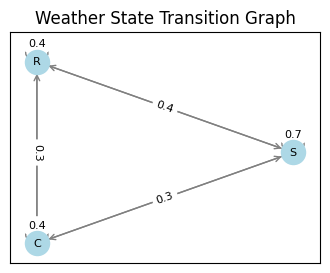

In [ ]:
#Plot the graph
# Create a directed graph from the transition matrix
G = nx.DiGraph()

# Add edges with weights from the transition matrix
for i, state_from in enumerate(states):
    for j, state_to in enumerate(states):
        weight = transition_matrix[i][j]
        G.add_edge(state_from, state_to, weight=weight)

# Define positions for nodes
pos = nx.circular_layout(G)  # Arrange nodes in a circular layout

# Draw the graph
plt.figure(figsize=(4, 3))
nx.draw_networkx_nodes(G, pos, node_size=300, node_color="lightblue")
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=10, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=8, font_color="black")

# Add edge labels (transition probabilities)
edge_labels = {(state_from, state_to): f"{data['weight']:.1f}"
               for state_from, state_to, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Weather State Transition Graph")
plt.show()


In [ ]:
# Lets use Markov Chain to predict the weather for the next 2 days
# Initial state distribution (assuming starting in state "S")
initial_state = np.array([1, 0, 0])  # 100% chance of starting in state "S"

# Number of days to predict
num_days = 2

# Initialize the state distribution
state_distribution = initial_state.copy()


# Store the state distributions for each day
state_distributions = [state_distribution.copy()]

# Iterate through each day to predict the weather
for day in range(num_days):
    # Update the state distribution using the transition matrix
    state_distribution = np.dot(state_distribution, transition_matrix)
    state_distributions.append(state_distribution.copy())

# Print the predicted state distributions for each day
print("Predicted state distributions for each day:")
for day, distribution in enumerate(state_distributions):
    print(f"Day {day}: {distribution}")

# Convert state distributions to percentages
state_distributions_percentage = [dist * 100 for dist in state_distributions]



Predicted state distributions for each day:
Day 0: [1 0 0]
Day 1: [0.7 0.2 0.1]
Day 2: [0.6  0.25 0.15]


## Activity to do

1. Predict what food item will be served after 10 days for the given state diagram below <br>
<img src="food.jpg" alt="State Transistion Matrix" width="300" height="150"> <br>

2. Read the notes http://www.statslab.cam.ac.uk/~rrw1/markov/M.pdf and simulate the example disucssed

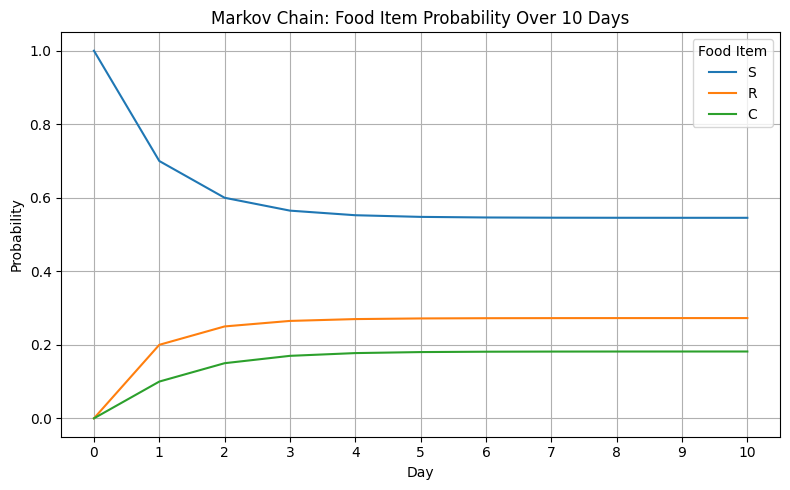

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the states and transition matrix
states = ["S", "R", "C"]  # S: Salad, R: Rice, C: Curry
transition_matrix = np.array([
    [0.7, 0.2, 0.1],  # From S
    [0.4, 0.4, 0.2],  # From R
    [0.3, 0.3, 0.4]   # From C
])

# Initial state (100% chance of Salad on day 0)
initial_state = np.array([1, 0, 0])

# Number of days to simulate
num_days = 10

# Store state distributions
state_distributions = [initial_state]

# Simulate the Markov Chain
current_state = initial_state
for _ in range(num_days):
    next_state = np.dot(current_state, transition_matrix)
    state_distributions.append(next_state)
    current_state = next_state

# Convert to numpy array for plotting
state_distributions = np.array(state_distributions)

# Plot the probabilities
plt.figure(figsize=(8, 5))
for i in range(len(states)):
    plt.plot(state_distributions[:, i], label=states[i])

plt.title("Markov Chain: Food Item Probability Over 10 Days")
plt.xlabel("Day")
plt.ylabel("Probability")
plt.xticks(range(num_days + 1))
plt.legend(title="Food Item")
plt.grid(True)
plt.tight_layout()
plt.show()
